In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

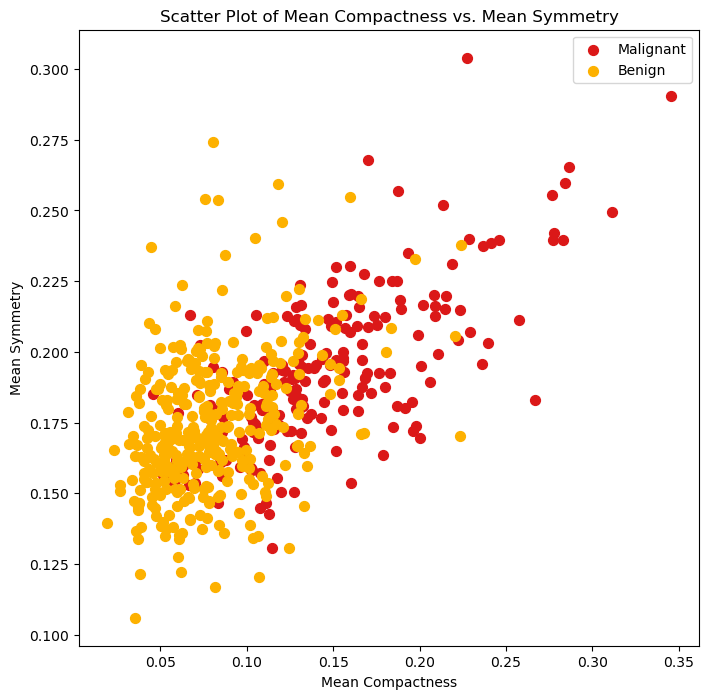

In [4]:
# Create a scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
targets = [0, 1] 
colors = ['#db1818', '#fdb100']


# Scatter plot with colors based on target values
for target, color in zip(targets, colors):
    indices_to_keep = y == target
    ax.scatter(X.loc[indices_to_keep, 'mean compactness'], X.loc[indices_to_keep, 'mean symmetry'], c=color, s=50)

# Set labels and title
ax.set_xlabel('Mean Compactness')
ax.set_ylabel('Mean Symmetry')
ax.set_title('Scatter Plot of Mean Compactness vs. Mean Symmetry')

# Add legend
ax.legend(['Malignant', 'Benign'])

# Show plot
plt.show()


In [5]:
subset_features = X[['mean compactness', 'mean symmetry']]
scaler = StandardScaler()
X_scaled_subset = scaler.fit_transform(subset_features)
pca = PCA(n_components=2)  
pca.fit(X_scaled_subset)
X_pca = pca.transform(X_scaled_subset)

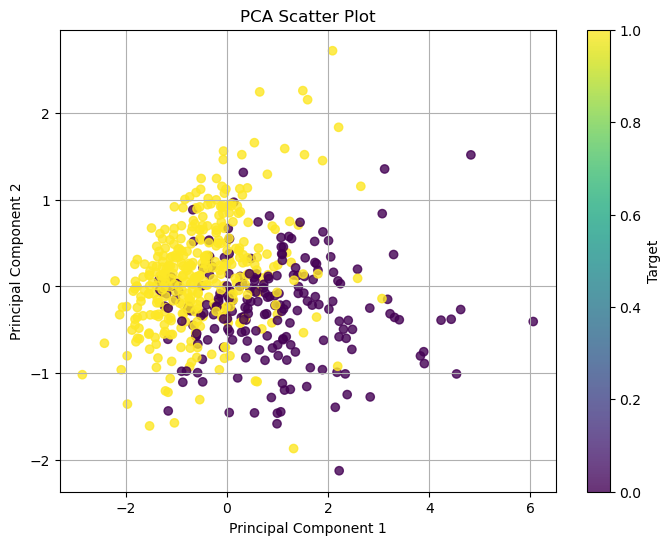

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

In [7]:
# ok, lets do PCA on all the features in the dataset 
pca = PCA(n_components=30)
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)

# Calculate explained variance ratio / eigen values 
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_

component_names = [f"PC{i+1}" for i in range(len(explained_variance_ratio))]

# Create a DataFrame to display the variance ratios
variance_df = pd.DataFrame({"Variance Ratio": explained_variance_ratio}, index=component_names)
print(variance_df)

      Variance Ratio
PC1         0.442720
PC2         0.189712
PC3         0.093932
PC4         0.066021
PC5         0.054958
PC6         0.040245
PC7         0.022507
PC8         0.015887
PC9         0.013896
PC10        0.011690
PC11        0.009797
PC12        0.008705
PC13        0.008045
PC14        0.005234
PC15        0.003138
PC16        0.002662
PC17        0.001980
PC18        0.001754
PC19        0.001649
PC20        0.001039
PC21        0.000999
PC22        0.000915
PC23        0.000811
PC24        0.000602
PC25        0.000516
PC26        0.000273
PC27        0.000230
PC28        0.000053
PC29        0.000025
PC30        0.000004


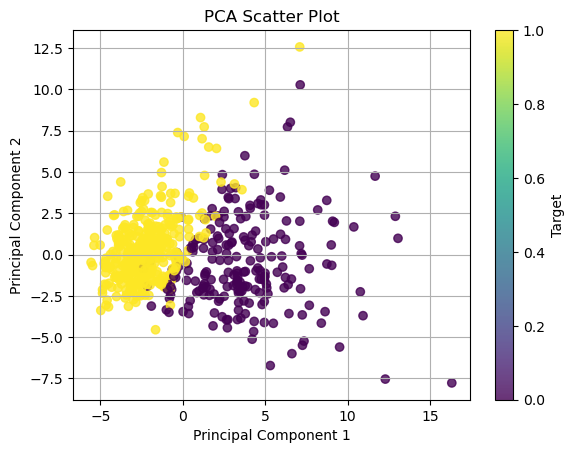

In [12]:
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

## Results

By doing PCA on the whole dataset, we get much better separation of our classes. Interestingly, the best performing component only explains 44% of the variance in the data. 